In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
k1 = pd.read_csv('kick1.dat', sep=" ", header=None)
k2 = pd.read_csv('kick2.dat', sep=" ", header=None)
k1.columns =['x', 'y', 'z']
k2.columns =['x', 'y', 'z']

### <b>Exploratory Data Analysis</b>

In [3]:
print(k1.shape)
print(k2.shape)

(20, 3)
(20, 3)


In [4]:
k1.head()

,x,y,z
0,-0.210,2.048,0.145
1,-0.305,1.999,0.103
2,-0.368,1.968,0.149
3,-0.370,1.902,0.110
4,-0.480,1.841,0.135


In [5]:
k2.head()

,x,y,z
0,-0.105,2.048,0.145
1,-0.162,1.999,0.177
2,-0.184,1.968,0.172
3,-0.185,1.902,0.167
4,-0.230,1.841,0.192


In [6]:
k1.describe()

,x,y,z
count,20.000000,20.000000,20.000000
mean,-0.727700,1.576650,0.119600
std,0.294473,0.295319,0.014605
min,-1.192000,1.109000,0.103000
25%,-0.974000,1.328750,0.109500
50%,-0.742500,1.589500,0.114000
75%,-0.519000,1.815500,0.128250
max,-0.210000,2.048000,0.149000


In [7]:
k2.describe()

,x,y,z
count,20.000000,20.000000,20.000000
mean,-0.363200,1.576650,0.237800
std,0.146036,0.295319,0.047159
min,-0.596000,1.109000,0.145000
25%,-0.491500,1.328750,0.207750
50%,-0.361000,1.589500,0.247000
75%,-0.257000,1.815500,0.280250
max,-0.105000,2.048000,0.296000


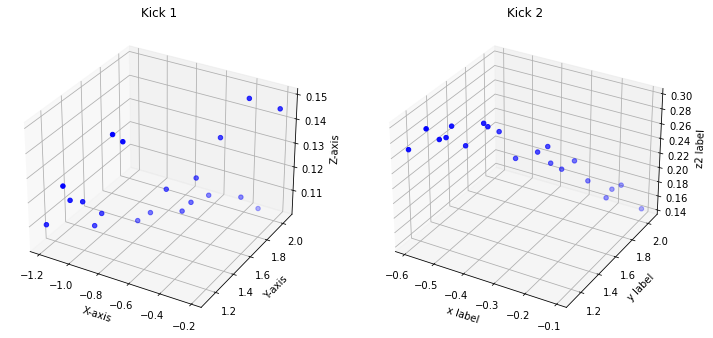

In [8]:
fig = plt.figure(figsize = (12, 12))

ax1 = fig.add_subplot(121,projection='3d')
#ax1.scatter(k1.iloc[:,0], k1.iloc[:,1], k1.iloc[:,2], c = 'b', marker='o')
ax1.scatter(k1['x'], k1['y'], k1['z'], c = 'b', marker='o')
ax1.set_xlabel('X-axis')
ax1.set_ylabel('Y-axis')
ax1.set_zlabel('Z-axis')
plt.title("Kick 1")

ax2 = fig.add_subplot(122,projection='3d')
ax2.scatter(k2['x'], k2['y'], k2['z'], c = 'b', marker='o')
ax2.set_xlabel('x label')
ax2.set_ylabel('y label')
ax2.set_zlabel('z2 label')
plt.title("Kick 2")

plt.show()

### <b>Linear Regression</b>

In [9]:
'''Construindo o tempo para 20 posições da bola no chute, dado que os dados são capturados a uma taxa de 
60 frames por segundo. Ou seja, cada posição da bola leva 0.016666667 segundos para ser capturado'''
i=0
T_full=[]
x=0.016666667
y=0
while i<=60:
    y=y+x
    T_full.append(y)
    i+=1
T=T_full[:20]
k1['t']=T
k2['t']=T

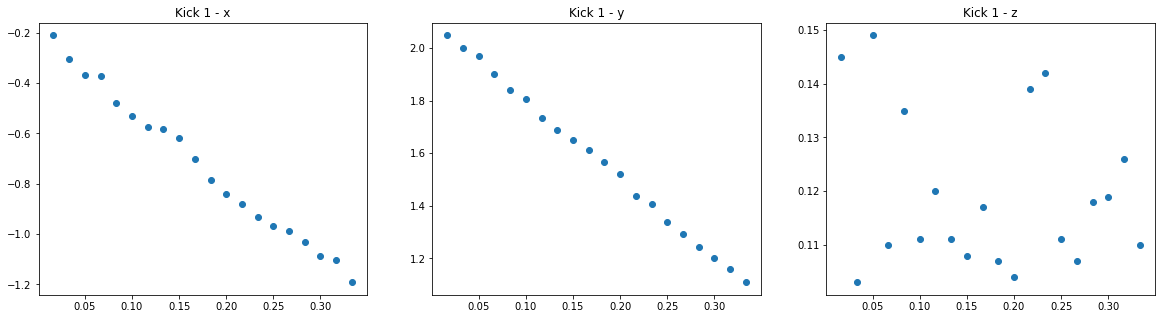

In [10]:
#resultados
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5))
ax1.set(title="Kick 1 - x")
ax1.scatter(k1['t'],k1['x'])
ax2.set(title="Kick 1 - y")
ax2.scatter(k1['t'],k1['y'])
ax3.set(title="Kick 1 - z")
ax3.scatter(k1['t'],k1['z'])
plt.show()

In [11]:
def cost_function(y, y_hat):
    #MSE
    error = 0
    for i in range(len(k1)):
        error += (k1['x'][i] - y_hat[i]) ** 2

    return error / len(k1)

0
0.12514381108908285


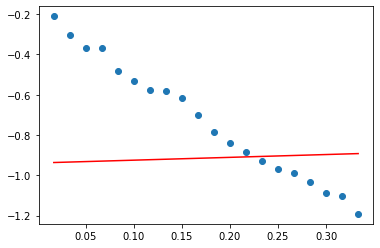

500
0.07708622845077845


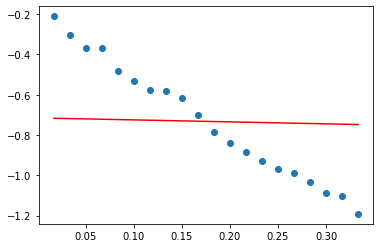

1000
0.06455697182820953


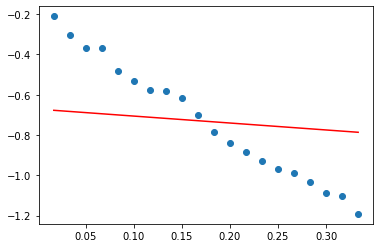

1500
0.05408329329215785


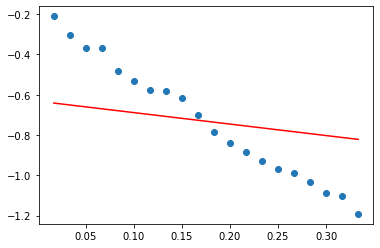

2000
0.04532795004711249


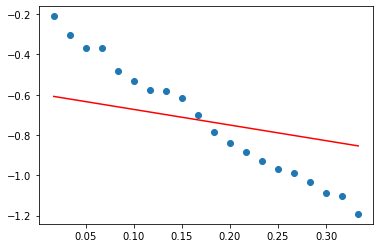

2500
0.038009028134939865


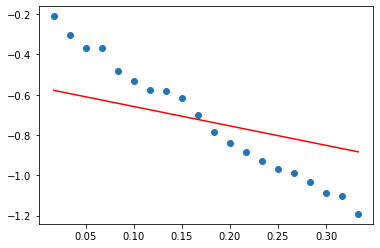

3000
0.03189086503644639


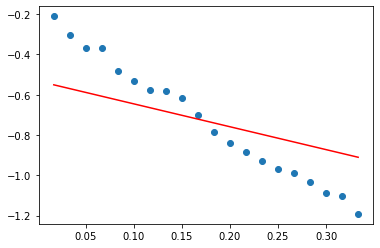

3500
0.026776461556131653


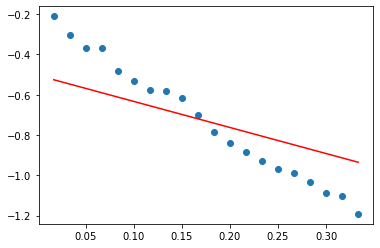

4000
0.022501138630220036


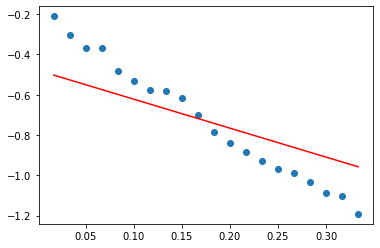

4500
0.018927234813053792


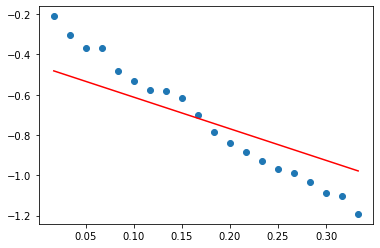

5000
0.015939673705811293


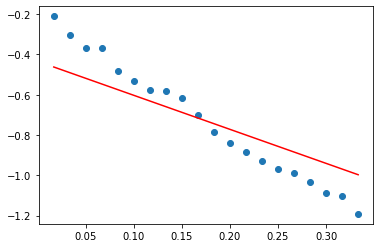

5500
0.013442258602853988


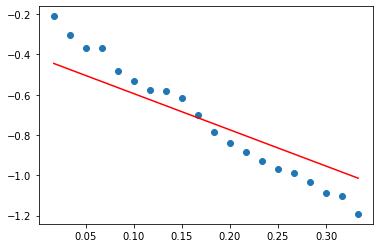

6000
0.011354575046738737


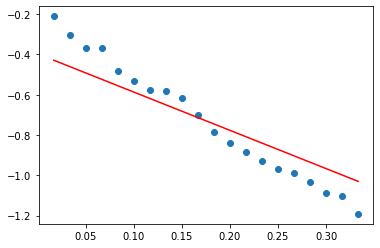

6500
0.009609401557032205


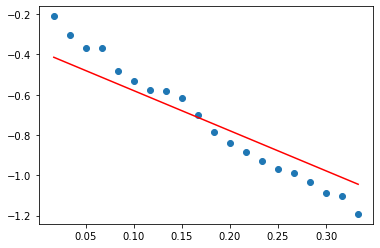

7000
0.008150545160787106


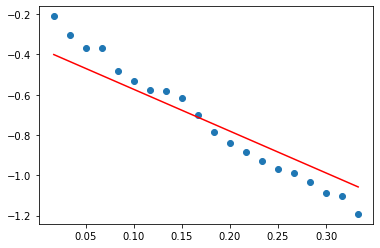

7500
0.006931032030764041


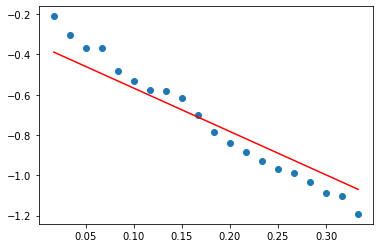

8000
0.005911594971621978


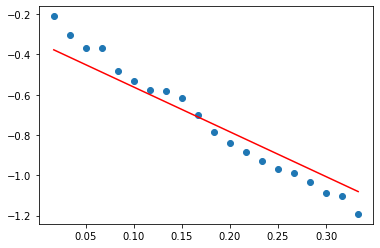

8500
0.005059409052531029


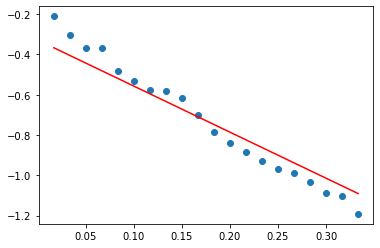

9000
0.00434703467474648


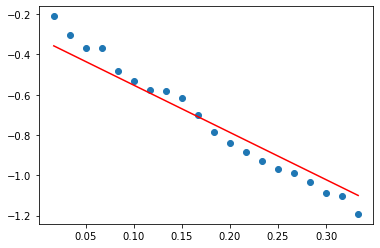

9500
0.0037515340418971255


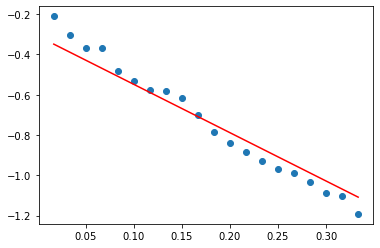

In [12]:
import random

loss = []
learning_rate = 0.01
n_iter = 10000
space_inter=n_iter/20

theta_0 = round(random.uniform(k1['x'].min(), k1['x'].max()),3)
theta_1 = round(random.uniform(k1['t'].min(), k1['t'].max()),3)


for i in range(n_iter):
    
    y_hat = theta_0 + np.dot(k1['t'],theta_1)
    
    mse = cost_function(k1['x'], y_hat)
    loss.append(mse)
    
    
    if i%space_inter==0:
        print(i)
        print(mse)
        plt.scatter(k1['t'],k1['x'])
        plt.plot(k1['t'],y_hat,c='red')
        plt.show()
    
    partial_w = (1 / len(k1)) * (2 * np.dot(np.array(k1['t']), (y_hat - k1['x'])))
    partial_d = (1 / len(k1)) * (2 * np.sum(y_hat - k1['x']))
    
    theta_1 -= learning_rate * partial_w
    theta_0 -= learning_rate * partial_d

### <b>Part 2</b>

- Load your dataset (loaddigits) from the sklearn.datasets module

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()

In [14]:
X = digits.data
y = digits.target

In [15]:
print('X:',X.shape)
print('y:',y.shape)

X: (1797, 64)
y: (1797,)


- Plot your data using any visualization method that suits you (t-SNE, UMAP, etc.)

In [16]:
import umap

reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
embedding.shape

(1797, 2)

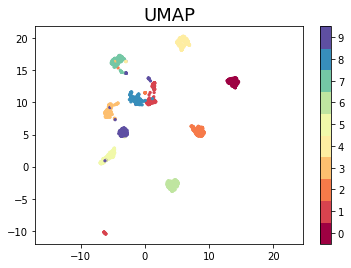

In [17]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP', fontsize=18);

- Split your data into training/test sets (90/10)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

- Logistic Regression

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression

KFold = KFold(n_splits=5)

model_lr = LogisticRegression(solver='liblinear')
result_lr = cross_val_score(model_lr, X_train, y_train, cv=KFold)
    
print(result_lr.mean())

0.9529985093452586


In [20]:
StratKFold = StratifiedKFold(n_splits=5)

model_lr = LogisticRegression(solver='liblinear')
result_lr = cross_val_score(model_lr, X_train, y_train, cv=StratKFold)
    
print(result_lr.mean())

0.9560983067691013


In [24]:
valores_C = np.array([0.01, 0.1, 0.5, 1, 2, 3, 5, 10, 20, 50, 100])
#valores_max_iter = np.array([50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
regularizacao = ['l1','l2']
#valores_grid = {'C':valores_C, 'penalty':regularizacao, 'max_iter':valores_max_iter}
valores_grid = {'C':valores_C, 'penalty':regularizacao}

model_lr = LogisticRegression(solver='liblinear', max_iter=200)

grid_model_lr = GridSearchCV(estimator=model_lr, param_grid=valores_grid, cv=5)
grid_model_lr.fit(X_train,y_train)

print('Melhor acuracia:',grid_model_lr.best_score_)
print('C:',grid_model_lr.best_estimator_.C)
print('Penalty:',grid_model_lr.best_estimator_.penalty)

Melhor acuracia: 0.9647517486526775
C: 0.1
Penalty: l1


In [35]:
model_lr = LogisticRegression(solver='liblinear', C=0.1, penalty='l2', max_iter=200)
model_lr.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=200, solver='liblinear')

- Decision Tree

In [29]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

KFold = KFold(n_splits=5)

model_dt = DecisionTreeClassifier()
result_dt = cross_val_score(model_dt, X_train, y_train, cv=KFold)
    
print(result_dt.mean())

0.8515670985743226


In [30]:
StratKFold = StratifiedKFold(n_splits=5)

model_dt = DecisionTreeClassifier()
result_dt = cross_val_score(model_dt, X_train, y_train, cv=StratKFold)
    
print(result_dt.mean())

0.8521824714291174


In [31]:
min_samples = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15])
max_depth = np.array([2,3,4,5,6,7,8,9,10,11,12,13,14,15])
algorit = ['gini','entropy']
valores_grid = {'min_samples_split':min_samples,'max_depth':max_depth,'criterion':algorit}

model_dt = DecisionTreeClassifier()

grid_model_dt = GridSearchCV(estimator=model_dt, param_grid=valores_grid, cv=5)
grid_model_dt.fit(X_train,y_train)

print('min_samples:',grid_model_dt.best_estimator_.min_samples_split)
print('max_depth:',grid_model_dt.best_estimator_.max_depth)
print('algorit:',grid_model_dt.best_estimator_.criterion)
print('Score:',grid_model_dt.best_score_)

min_samples: 2
max_depth: 11
algorit: entropy
Score: 0.8744467377594314


- Melhor modelo

0.9777777777777777


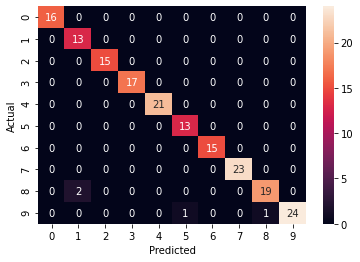

In [43]:
y_pred = model_lr.predict(X_test)
score = model_lr.score(X_test, y_test)
print(score)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()